In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## An analysis of Kei Neishikori's performance from 2007 - 2017


Data retrieved from https://www.kaggle.com/gmadevs/atp-matches-dataset

In [2]:
## reference of the column names: https://www.kaggle.com/kittishane/analysis-of-roger-federer
cols = [
    'tourney_id', # Id of Tournament
    'tourney_name', # Name of the Tournament
    'surface', # Surface of the Court (Hard, Clay, Grass)
    'draw_size', # Number of people in the tournament
    'tourney_level', # Level of the tournament (A=ATP Tour, D=Davis Cup, G=Grand Slam, M=Masters)
    'tourney_date', # Start date of tournament
    'match_num', # Match number
    'winner_id', # Id of winner
    'winner_seed', # Seed of winner
    'winner_entry', # How the winner entered the tournament
    'winner_name', # Name of winner
    'winner_hand', # Dominant hand of winner (L=Left, R=Right, U=Unknown?)
    'winner_ht', # Height in cm of winner
    'winner_ioc', # Country of winner
    'winner_age', # Age of winner
    'winner_rank', # Rank of winner
    'winner_rank_points', # Rank points of winner
    'loser_id',
    'loser_seed',
    'loser_entry',
    'loser_name',
    'loser_hand',
    'loser_ht',
    'loser_ioc',
    'loser_age',
    'loser_rank',
    'loser_rank_points',
    'score', # Score
    'best_of', # Best of X number of sets
    'round', # Round
    'minutes', # Match length in minutes
    'w_ace', # Number of aces for winner
    'w_df', # Number of double faults for winner
    'w_svpt', # Number of service points played by winner
    'w_1stIn', # Number of first serves in for winner
    'w_1stWon', # Number of first serve points won for winner
    'w_2ndWon', # Number of second serve points won for winner
    'w_SvGms', # Number of service games played by winner
    'w_bpSaved', # Number of break points saved by winner
    'w_bpFaced', # Number of break points faced by winner
    'l_ace',
    'l_df',
    'l_svpt',
    'l_1stIn',
    'l_1stWon',
    'l_2ndWon',
    'l_SvGms',
    'l_bpSaved',
    'l_bpFaced'
]

## loading data 2007-2017



games_data = []
for i in range(11):
    year = str(2007+i)
    games_i = pd.read_csv('./data/atp_matches_'+year+'.csv', usecols = cols)
    games_i = games_i[games_i['winner_name'].notnull() & games_i['loser_name'].notnull()]
    print(len(games_i))
    games_data.append(games_i)

ratio_table = pd.DataFrame(index = ['rate', 'total_games', 'ACE_ratio', 'DF_ratio'], columns = range(2007,2018))
name = 'Kei Nishikori'




3152
3110
3074
3058
3030
3025
2959
2901
2958
2941
388


## Part I: winning rate over years

In [3]:


i = 0
for dataset in games_data:
    win_count = len(dataset[dataset['winner_name'].str.match(name)])
    lose_count = len(dataset[dataset['loser_name'].str.match(name)])
    win_rate = win_count / (win_count + lose_count)
    total = win_count + lose_count
    ratio_table.loc['rate', 2007+i] = win_rate
    ratio_table.loc['total_games', 2007+i] = total
    i += 1

temp = ratio_table.T
ratio_table.iloc[:2]

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
rate,0.375,0.586207,0.4,0.25,0.62069,0.660714,0.654545,0.782609,0.763889,0.725,0.75
total_games,8,29,10,12,58,56,55,69,72,80,8


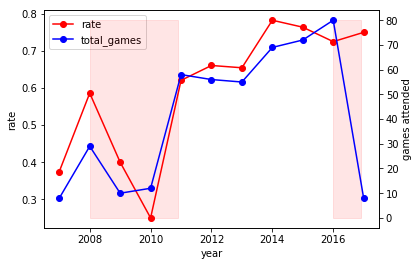

In [4]:
fill_years_1 = np.arange(2008, 2011, 0.1) 
fill_years_2 = np.arange(2016, 2017, 0.1)
fig,ax=plt.subplots()
line1 = ax.plot(temp.index, temp.rate, color="red", marker="o")
ax2 = ax.twinx()
line2 = ax2.plot(temp.index, temp.total_games,color="blue", marker="o")

ax.set_xlabel('year')
ax.set_ylabel('rate')
ax2.set_ylabel('games attended')
ax2.fill_between(fill_years_1, np.max(temp.total_games), 0, color = "red", alpha=0.1)
ax2.fill_between(fill_years_2, np.max(temp.total_games), 0, color = "red", alpha=0.1)
lns = line1+line2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
plt.show()


Figure 01: 
<br />
<br />
If one neglect two parts marked in red(the first was due to his injury and the second was due to insufficiency of data), one can notice that there was a increased trend in his wining rate. However, it still has a gap between the top 5 players whose rate is around 80 to 90 percent.
<br />
<br />

## Part II: Ace, double fault vs Number of service points 

In [5]:

def calculateAceRatio(row):
    if row.winner_name == name and row.w_svpt != 0:
        return row.w_ace / row.w_svpt
    elif row.loser_name == name and row.l_svpt != 0:
        return row.l_ace / row.l_svpt
    
def calculateDFRatio(row):
    if row.winner_name == name and row.w_svpt != 0:
        return row.w_df / row.w_svpt
    elif row.loser_name == name and row.l_svpt != 0:
        return row.l_df / row.l_svpt


j = 0
for dataset in games_data:
    dataset = dataset[dataset.w_svpt.notnull() & dataset.l_svpt.notnull()].reset_index()
    ACE = dataset.apply(calculateAceRatio, axis = 1)
    ACE = ACE.dropna()
    ratio_table.loc['ACE_ratio', 2007+j] = np.mean(ACE)
    DF = dataset.apply(calculateDFRatio, axis = 1)
    DF = DF.dropna()
    ratio_table.loc['DF_ratio', 2007+j] = np.mean(DF)
    j += 1
temp2 = ratio_table.iloc[2:].T
ratio_table


,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
rate,0.375,0.586207,0.4,0.25,0.62069,0.660714,0.654545,0.782609,0.763889,0.725,0.75
total_games,8,29,10,12,58,56,55,69,72,80,8
ACE_ratio,0.0435931,0.0431751,0.0516414,0.0359618,0.0332739,0.034608,0.0376966,0.0559972,0.0608056,0.0424897,0.0469819
DF_ratio,0.0515308,0.0392218,0.0557194,0.0572155,0.0380567,0.0342976,0.0407694,0.0368513,0.0335095,0.0301977,0.0138732


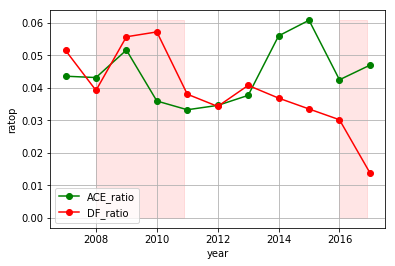

In [6]:
fill_years_1 = np.arange(2008, 2011, 0.1) 
fill_years_2 = np.arange(2016, 2017, 0.1)

fig,ax1=plt.subplots()
line1 = ax1.plot(temp2.index, temp2.ACE_ratio, color="green", marker="o")
line2 = ax1.plot(temp2.index, temp2.DF_ratio, color="red", marker="o")

ax1.set_xlabel('year')
ax1.set_ylabel('ratop')
ax1.fill_between(fill_years_1, np.max(temp2.ACE_ratio), 0, color = "red", alpha=0.1)
ax1.fill_between(fill_years_2, np.max(temp2.ACE_ratio), 0, color = "red", alpha=0.1)
lns2 = line1+line2
labs2 = [l.get_label() for l in lns2]
ax1.legend(lns2, labs2, loc=3)
plt.grid()
plt.show()

Figure 02:
<br />
<br />
We see that before the year 2013, his ACE and Double Fault ratio were about the same, and after the year 2013, there was a significant increase in his ACE performance. Meantime, the overall trend of his Double Fault ratio decreased.
<br />
<br />

## Part III: Kei's opponents 


In [7]:

opp_dict = {}
#  opp loser(kei won) winner(kei lost) rank(when first encounter) height
for dataset in games_data:
    dataset = dataset[dataset.winner_name.str.match(name) | dataset.loser_name.str.match(name)]
    for idx, row in dataset.iterrows():
        winner = row.winner_name
        loser = row.loser_name
        if winner != name:
            if winner not in opp_dict:
                opp_dict[winner] = [0,1,row.winner_rank, row.winner_ht]
            else:
                opp_dict[winner][1] += 1
        else:
            if loser not in opp_dict:
                opp_dict[loser] = [1,0,row.loser_rank,row.loser_ht]
            else:
                opp_dict[loser][0] += 1
                
           
        
opp_table = pd.DataFrame(data = opp_dict).T.rename(columns = {0:'Kei won', 1:'Kei lost', 2:'Opp rank', 3:'Height'})      
opp_table['Total encounters'] = opp_table['Kei won'] + opp_table['Kei lost'] 
opp_table = opp_table.sort_values(by = ['Total encounters'], ascending = False)



Text(0.5, 1.0, "Kei's TOP 15 frequent opponent")

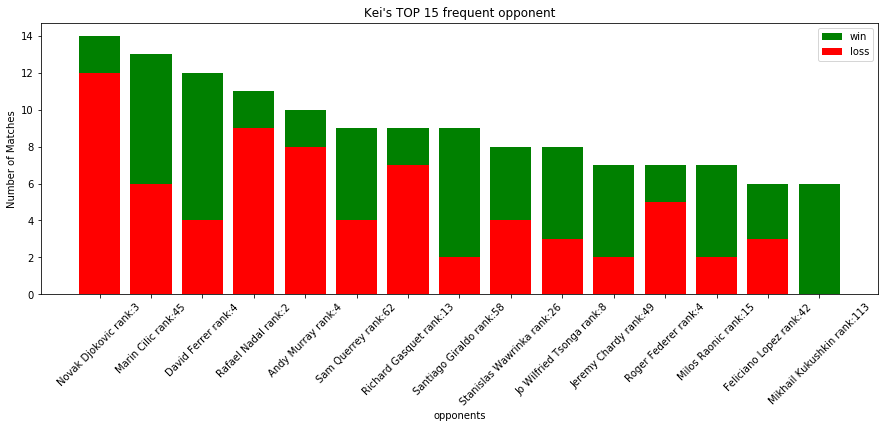

In [8]:
temp0 = opp_table.index[:15].to_numpy() 
temp1 = opp_table['Opp rank'][:15].to_numpy().astype(np.int32)
temp2 = np.array([str(em) for em in temp1])
xbar = temp0 + ' rank:' + temp2


plt.figure(figsize=(15,5))

plt.xticks(rotation=45)
plt.xlabel('opponents')
plt.ylabel('Number of Matches')

plt.bar(xbar,opp_table['Total encounters'][:15], label='win',color = 'green')
plt.bar(xbar,opp_table['Kei lost'][:15], label='loss', color = 'red')
plt.legend()
plt.title("Kei's TOP 15 frequent opponent")

Figure 03:
<br />
<br />
We saw that Kei's performance was good in terms of the most of his frequent opponents. However, when encountering Djokovic, Nadal, Murray and Federer, his performance was not that good. Therefore, we can conclude that there's room for his improvement.
<br />
<br />

## Part IV: T test of the mean heights


Use T-test to test if there's a difference between the mean height of top 50 frequent opponent that Kei lost most of his games and the mean height of the top 50 frequent opponent that Kei won most of his games
<br />
<br />

$H_0$: mean(top 50 lost players) = mean(top 50 won players) 
<br />
$H_1$: mean(top 50 lost players) $\neq$ mean(top 50 won players) 
<br />
significance level: 0.05
<br />
<br />

           Height
count   50.000000
mean   186.300000
std      7.068903
min    163.000000
25%    183.000000
50%    185.000000
75%    189.500000
max    203.000000
           Height
count   50.000000
mean   187.640000
std      7.392108
min    175.000000
25%    183.000000
50%    188.000000
75%    192.250000
max    208.000000


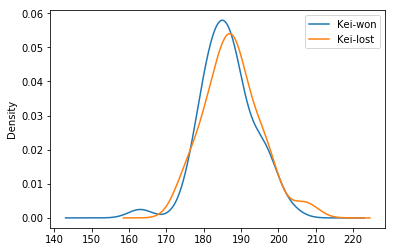

In [28]:
print(won_sample.describe())
print(lost_sample.describe())
df = pd.DataFrame({
    'Kei-won':won_sample.Height.tolist(),
    'Kei-lost':lost_sample.Height.tolist(),
})
df.plot.kde()

In [29]:
from scipy.stats import ttest_ind
won = opp_table.sort_values(by = ['Kei won'], ascending = False).dropna()
won_sample = won[['Height']][:50]

alpha = 0.05
lost = opp_table.sort_values(by = ['Kei lost'], ascending = False).dropna()
lost_sample = lost[['Height']][:50]
test, p_value= ttest_ind(won_sample, lost_sample)

if p_value[0] < alpha: print('does not reject the null, with p value equals %.5f' %p_value[0])
else: print('reject the null, with p value equals %.5f' %p_value[0])

print('Mean height of his opponent %.3f' %np.mean(opp_table['Height']))
print('while the height of Kei is around 178 cm' )

reject the null, with p value equals 0.35651
Mean height of his opponent 185.927
while the height of Kei is around 178 cm
